In [1]:
import pandas as pd
import numpy as np

# Human Resource / People analytics data.
Project for data cleaning and data visualisation. Read disclaimer attributed to the original author for this project.

# Data cleaning

## Extraction Phase

There is a total of 5 data in which one of them is about survey. The remaining 4 data is considered to essential for the overall analysis while the survey data will be separately used for engagement analysis. Both combined will create People Analytics.

I identified the 4 data as listed:
- company data → `2021.06_COL_2021.txt`
- job_detail data → `2021.06_job_profile_mapping.txt`
- full data → `CompanyData.txt`
- demographic data → `Diversity.txt`

In addition with survey data → `EngagementSurvey.txt`

### Importing first 4 data

In [2]:
import time

In [3]:
print('Extracting Data ...')
start_time = time.time()

Extracting Data ...


In [4]:
company_data = pd.read_csv('data/2021.06_COL_2021.txt', sep='\t')
company_data.head()

,Office,COL Amount,Currency
0,NYC,100,USD
1,Boulder,70,USD
2,Oslo,70,NOK
3,SanJose,90,USD
4,London,90,GBP


In [5]:
job_data = pd.read_csv('data/2021.06_job_profile_mapping.txt', sep='\t')
job_data.head()

,Department,Job_title,Job_Profile,Compensation,Level,Bonus %
0,Corporate,CEO,JP_1000,"500,000.00",CSuite,1.00
1,Corporate,HR Manager,JP_1001,"100,000.00",Manager,0.20
2,Corporate,AR Specialist,JP_1002,"65,000.00",Individual Contributor,0.15
3,Corporate,AP Specialist,JP_1003,"65,000.00",Individual Contributor,0.15
4,Corporate,FP&A Analyst,JP_1004,"70,000.00",Individual Contributor,0.15


In [6]:
full_data = pd.read_csv('data/CompanyData.txt', sep='\t', encoding='utf_16_le')
full_data.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,...,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,NY,New York,13212,US,United States,...,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,100002,David,Rickards,4265 Graystone Lakes,Macon,GA,Georgia,31206,US,United States,...,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001,Changes for 2021.06:
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,NJ,New Jersey,07087,US,United States,...,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022,Changes for 2021.06:
3,100004,Justin,Edgin,1262 Limer Street,Rome,GA,Georgia,30165,US,United States,...,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036,Changes for 2021.06:
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,CA,California,92705,US,United States,...,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015,Changes for 2021.06:


In [7]:
demographic_data = pd.read_csv('data/Diversity.txt', sep='\t')
demographic_data.head()

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
0,100001,female,female,White,0,0,Undergraduate,Heterosexual
1,100002,male,male,White,0,1,Undergraduate,Heterosexual
2,100003,female,female,Asian,0,0,Undergraduate,Heterosexual
3,100004,male,male,White,0,0,Undergraduate,Heterosexual
4,100005,male,male,Hispanic or Latino,0,0,Undergraduate,Missing


In [8]:
survey_data = pd.read_csv('data/EngagementSurvey.txt', sep='\t')
survey_data.head()

,EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.,...,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?
0,100001,2023Q2,3,3,2,1,1,3,2,4,...,3,4,2,2,4,4,3,3,NaN,NaN
1,100002,2023Q2,3,4,2,4,2,4,4,2,...,3,1,5,1,2,4,3,1,NaN,NaN
2,100009,2023Q2,3,4,2,3,4,3,2,2,...,1,1,3,2,2,3,2,4,NaN,NaN
3,100014,2023Q2,4,1,5,2,5,3,4,4,...,3,4,2,2,4,3,3,2,NaN,NaN
4,100018,2023Q2,4,1,1,1,2,3,1,3,...,4,3,2,4,3,2,2,3,NaN,NaN


In [9]:
print('Extraction done in --- %s seconds ---' % (time.time()-start_time))

Extraction done in --- 0.08478116989135742 seconds ---


# Transformation Phase

In [10]:
print('Transforming Data ...')
start_time = time.time()

Transforming Data ...


Let's first find out how many data we have in each table

In [11]:
print('The company data has {0} columns and {1} rows'.format(company_data.shape[1],company_data.shape[0]))
print('The job data has {0} columns and {1} rows'.format(job_data.shape[1],job_data.shape[0]))
print('The full data has {0} columns and {1} rows'.format(full_data.shape[1],full_data.shape[0]))
print('The demographic data has {0} columns and {1} rows'.format(demographic_data.shape[1],demographic_data.shape[0]))
print('The survey data has {0} columns and {1} rows'.format(survey_data.shape[1],survey_data.shape[0]))

The company data has 3 columns and 9 rows
The job data has 6 columns and 54 rows
The full data has 25 columns and 4968 rows
The demographic data has 8 columns and 4968 rows
The survey data has 23 columns and 2827 rows


## Company Data

In [12]:
company_data

,Office,COL Amount,Currency
0,NYC,100,USD
1,Boulder,70,USD
2,Oslo,70,NOK
3,SanJose,90,USD
4,London,90,GBP
5,Tokyo,85,JPY
6,HongKong,85,HKD
7,SanFran,100,USD
8,Austin,70,USD


In [13]:
company_data.describe(include='all')

,Office,COL Amount,Currency
count,9,9.000000,9
unique,9,NaN,5
top,NYC,NaN,USD
freq,1,NaN,5
mean,NaN,84.444444,NaN
std,NaN,12.104866,NaN
min,NaN,70.000000,NaN
25%,NaN,70.000000,NaN
50%,NaN,85.000000,NaN
75%,NaN,90.000000,NaN


The company data stores a fairly simple model. It stores the office location, the column amount, and currency in three letters code. No null values found, we might need to comeback here after examining all data.

## Job data

In [14]:
job_data.head(10)

,Department,Job_title,Job_Profile,Compensation,Level,Bonus %
0,Corporate,CEO,JP_1000,"500,000.00",CSuite,1.00
1,Corporate,HR Manager,JP_1001,"100,000.00",Manager,0.20
2,Corporate,AR Specialist,JP_1002,"65,000.00",Individual Contributor,0.15
3,Corporate,AP Specialist,JP_1003,"65,000.00",Individual Contributor,0.15
4,Corporate,FP&A Analyst,JP_1004,"70,000.00",Individual Contributor,0.15
5,Corporate,Coordinator,JP_1005,"50,000.00",Individual Contributor,0.15
6,Corporate,HR Coordinator,JP_1006,"50,000.00",Individual Contributor,0.15
7,Corporate,Counsel,JP_1007,"220,000.00",Individual Contributor,0.15
8,Corporate,Finance Coordinator,JP_1008,"55,000.00",Individual Contributor,0.15
9,Corporate,Accountant,JP_1009,"85,000.00",Individual Contributor,0.15


In [15]:
job_data.describe(include='all')

,Department,Job_title,Job_Profile,Compensation,Level,Bonus %
count,54,54,54,54,54,54.000000
unique,5,54,54,31,8,NaN
top,Corporate,CEO,JP_1000,"85,000.00",Individual Contributor,NaN
freq,21,1,1,4,20,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.227778
std,NaN,NaN,NaN,NaN,NaN,0.150680
min,NaN,NaN,NaN,NaN,NaN,0.100000
25%,NaN,NaN,NaN,NaN,NaN,0.150000
50%,NaN,NaN,NaN,NaN,NaN,0.150000
75%,NaN,NaN,NaN,NaN,NaN,0.200000


### Converting `Compensation` into float data type

In [16]:
job_data.rename(columns={' Compensation ':'Compensation'}, inplace=True)
job_data['Compensation']=job_data['Compensation'].str.strip().str.replace(',','')
job_data['Compensation']=pd.to_numeric(job_data['Compensation'])

In [17]:
job_data.head()

,Department,Job_title,Job_Profile,Compensation,Level,Bonus %
0,Corporate,CEO,JP_1000,500000.0,CSuite,1.00
1,Corporate,HR Manager,JP_1001,100000.0,Manager,0.20
2,Corporate,AR Specialist,JP_1002,65000.0,Individual Contributor,0.15
3,Corporate,AP Specialist,JP_1003,65000.0,Individual Contributor,0.15
4,Corporate,FP&A Analyst,JP_1004,70000.0,Individual Contributor,0.15


In [18]:
job_data.describe(include='all')

,Department,Job_title,Job_Profile,Compensation,Level,Bonus %
count,54,54,54,54.000000,54,54.000000
unique,5,54,54,NaN,8,NaN
top,Corporate,CEO,JP_1000,NaN,Individual Contributor,NaN
freq,21,1,1,NaN,20,NaN
mean,NaN,NaN,NaN,164907.407407,NaN,0.227778
std,NaN,NaN,NaN,116584.614752,NaN,0.150680
min,NaN,NaN,NaN,50000.000000,NaN,0.100000
25%,NaN,NaN,NaN,76250.000000,NaN,0.150000
50%,NaN,NaN,NaN,115000.000000,NaN,0.150000
75%,NaN,NaN,NaN,215000.000000,NaN,0.200000


In [19]:
job_data.isna().sum()

Department      0
Job_title       0
Job_Profile     0
Compensation    0
Level           0
Bonus %         0
dtype: int64

The job details data does not have any null values. At the current stage, I only need to convert `Compensation` data type.

## Full data

In [20]:
full_data.head(10)

,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,...,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,NY,New York,13212,US,United States,...,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,100002,David,Rickards,4265 Graystone Lakes,Macon,GA,Georgia,31206,US,United States,...,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001,Changes for 2021.06:
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,NJ,New Jersey,07087,US,United States,...,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022,Changes for 2021.06:
3,100004,Justin,Edgin,1262 Limer Street,Rome,GA,Georgia,30165,US,United States,...,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036,Changes for 2021.06:
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,CA,California,92705,US,United States,...,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015,Changes for 2021.06:
5,100006,Nelson,Grillo,3645 Coolidge Street,North Custer,MT,Montana,59024,US,United States,...,Sales,USD,0.15,Account Executive,6/21/1993,Individual Contributor,76000,1,JP_1029,Changes for 2021.06: Termed
6,100007,Kevin,Rainey,977 Black Oak Hollow Road,Santa Clara,CA,California,95054,US,United States,...,Customer Service,USD,0.15,Account Manager,5/13/1990,Individual Contributor,56000,0,JP_1016,Changes for 2021.06:
7,100008,Melanie,Hurst,2751 Holden Street,San Diego,CA,California,92103,US,United States,...,Sales,USD,0.15,Account Executive,1/23/1983,Individual Contributor,72000,0,JP_1029,Changes for 2021.06:
8,100009,Greg,Boon,4791 Loving Acres Road,Grapevine,TX,Texas,76051,US,United States,...,Sales,USD,0.20,"Director, Sales",1/4/1992,Director,74000,1,JP_1030,Changes for 2021.06:
9,100010,Frank,Stockdale,1413 Roy Alley,Centennial,CO,Colorado,80111,US,United States,...,Customer Service,USD,0.15,Account Manager,10/21/1989,Individual Contributor,52000,0,JP_1016,Changes for 2021.06:


In [21]:
full_data['Notes']

0                              Changes for 2021.06:  
1                              Changes for 2021.06:  
2                              Changes for 2021.06:  
3                              Changes for 2021.06:  
4                              Changes for 2021.06:  
                            ...                      
4963    Changes for 2021.06: Added on 2021.06, Termed
4964          Changes for 2021.06: Added on 2021.06, 
4965          Changes for 2021.06: Added on 2021.06, 
4966          Changes for 2021.06: Added on 2021.06, 
4967          Changes for 2021.06: Added on 2021.06, 
Name: Notes, Length: 4968, dtype: object

Unseen Columns

In [22]:
full_data.head().iloc[:,5:]

,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,NY,New York,13212,US,United States,35,NYC,5/4/2009,12/12/2999,Corporate,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,GA,Georgia,31206,US,United States,49,NYC,5/4/2009,12/12/2999,Corporate,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001,Changes for 2021.06:
2,NJ,New Jersey,07087,US,United States,32,NYC,5/18/2009,6/5/2013,Corporate,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022,Changes for 2021.06:
3,GA,Georgia,30165,US,United States,25,Boulder,6/22/2009,10/16/2013,Corporate,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036,Changes for 2021.06:
4,CA,California,92705,US,United States,49,NYC,7/13/2009,1/10/2011,Corporate,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015,Changes for 2021.06:


In [23]:
full_data.describe(include='all').iloc[:,:13]

,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date
count,4968.000000,4968,4968,4846,4846,4446,4445,4968,4968,4968,4968.000000,4968,4968
unique,NaN,1455,2863,4843,1962,101,51,2837,5,5,NaN,9,609
top,NaN,James,Smith,4866 Fairfax Drive,New York,CA,California,0,US,United States,NaN,NYC,1/12/2015
freq,NaN,97,78,2,87,445,494,122,4446,4446,NaN,1796,41
mean,102484.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.187399,NaN,NaN
std,1434.282399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.368092,NaN,NaN
min,100001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN
25%,101242.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN
50%,102484.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN
75%,103726.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,NaN


In [24]:
full_data.describe(include='all').iloc[:,13:]

,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
count,4968,4968,4968,4968,4968.000000,4968,4968,4968,4.968000e+03,4968.000000,4968,4968
unique,1797,2,5,5,NaN,54,4268,8,NaN,NaN,54,4
top,12/12/2999,Corporate,Technology,USD,NaN,Software Engineer,6/10/1983,Individual Contributor,NaN,NaN,JP_1038,Changes for 2021.06:
freq,2413,2972,1915,4446,NaN,1019,5,2947,NaN,NaN,1019,3921
mean,NaN,NaN,NaN,NaN,0.160688,NaN,NaN,NaN,1.502856e+05,0.626610,NaN,NaN
std,NaN,NaN,NaN,NaN,0.035295,NaN,NaN,NaN,6.169536e+05,0.483753,NaN,NaN
min,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,2.000000e+03,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.150000,NaN,NaN,NaN,5.800000e+04,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.150000,NaN,NaN,NaN,7.600000e+04,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.150000,NaN,NaN,NaN,9.400000e+04,1.000000,NaN,NaN


Notice that the termination_date includes 12/12/2999 which can indicate that the employee has not terminated yet. For data analysis purpose, replacing it with `NaN` will be more correct.

Converting `start_date` and `termination_date` to datetime object. Dropping `Notes` column as well.

In [25]:
full_data.drop('Notes', axis=1, inplace=True)

In [26]:
full_data['Start_Date']=pd.to_datetime(full_data['Start_Date'])
full_data['Termination_Date']=pd.to_datetime(full_data['Termination_Date'], errors='coerce')
full_data.dtypes

EmployeeID                   int64
First_Name                  object
Surname                     object
StreetAddress               object
City                        object
State                       object
StateFull                   object
ZipCode                     object
Country                     object
CountryFull                 object
Age                          int64
Office                      object
Start_Date          datetime64[ns]
Termination_Date    datetime64[ns]
Office_Type                 object
Department                  object
Currency                    object
Bonus_pct                  float64
Job_title                   object
DOB                         object
level                       object
Salary                       int64
Active Status                int64
Job_Profile                 object
dtype: object

In [27]:
full_data.head().iloc[:, 8:]

,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile
0,US,United States,35,NYC,2009-05-04,NaT,Corporate,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000
1,US,United States,49,NYC,2009-05-04,NaT,Corporate,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001
2,US,United States,32,NYC,2009-05-18,2013-06-05,Corporate,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022
3,US,United States,25,Boulder,2009-06-22,2013-10-16,Corporate,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036
4,US,United States,49,NYC,2009-07-13,2011-01-10,Corporate,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015


Adding `start_year` and `termination_year` as a column

In [28]:
full_data['start_year']=full_data['Start_Date'].dt.strftime('%Y')
full_data['termination_year']=full_data['Termination_Date'].dt.strftime('%Y')
full_data.tail().iloc[:,12:]

,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,start_year,termination_year
4963,2021-03-08,2022-11-27,Corporate,Marketing,USD,0.50,Chief Marketing Officer,11/27/1950,CSuite,370000,1,JP_1045,2021,2022
4964,2021-01-25,NaT,Technology,Technology,USD,0.15,Software Engineer,7/5/1975,Individual Contributor,77000,1,JP_1038,2021,NaN
4965,2021-08-23,NaT,Corporate,Sales,USD,0.15,Sales Team Lead,4/3/1982,Senior,85500,1,JP_1034,2021,NaN
4966,2021-02-01,NaT,Technology,Technology,USD,0.15,Senior Software Engineer,6/18/2001,Senior,98000,1,JP_1040,2021,NaN
4967,2021-09-06,NaT,Corporate,Corporate,USD,0.50,Chief Financial Officer,2/6/1970,CSuite,390000,1,JP_1048,2021,NaN


Adding tenure to data by first identifying whether employee has quitted or not

In [37]:
full_data['has_quitted']=None
full_data['has_quitted'].loc[~full_data['termination_year'].isna()]='Yes'
full_data['has_quitted'].loc[full_data['termination_year'].isna()]='No'
full_data.iloc[:, 10:]

/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_6077/2715593384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['has_quitted'].loc[~full_data['termination_year'].isna()]='Yes'
/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_6077/2715593384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['has_quitted'].loc[full_data['termination_year'].isna()]='No'


,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,start_year,termination_year,has_quitted,tenure
0,35,NYC,2009-05-04,NaT,Corporate,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000,2009,NaN,No,None
1,49,NYC,2009-05-04,NaT,Corporate,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001,2009,NaN,No,None
2,32,NYC,2009-05-18,2013-06-05,Corporate,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022,2009,2013,Yes,None
3,25,Boulder,2009-06-22,2013-10-16,Corporate,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036,2009,2013,Yes,None
4,49,NYC,2009-07-13,2011-01-10,Corporate,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015,2009,2011,Yes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,70,NYC,2021-03-08,2022-11-27,Corporate,Marketing,USD,0.50,Chief Marketing Officer,11/27/1950,CSuite,370000,1,JP_1045,2021,2022,Yes,None
4964,46,Boulder,2021-01-25,NaT,Technology,Technology,USD,0.15,Software Engineer,7/5/1975,Individual Contributor,77000,1,JP_1038,2021,NaN,No,None
4965,39,SanJose,2021-08-23,NaT,Corporate,Sales,USD,0.15,Sales Team Lead,4/3/1982,Senior,85500,1,JP_1034,2021,NaN,No,None
4966,20,Austin,2021-02-01,NaT,Technology,Technology,USD,0.15,Senior Software Engineer,6/18/2001,Senior,98000,1,JP_1040,2021,NaN,No,None


In [39]:
full_data.dtypes

EmployeeID                   int64
First_Name                  object
Surname                     object
StreetAddress               object
City                        object
State                       object
StateFull                   object
ZipCode                     object
Country                     object
CountryFull                 object
Age                          int64
Office                      object
Start_Date          datetime64[ns]
Termination_Date    datetime64[ns]
Office_Type                 object
Department                  object
Currency                    object
Bonus_pct                  float64
Job_title                   object
DOB                         object
level                       object
Salary                       int64
Active Status                int64
Job_Profile                 object
start_year                  object
termination_year            object
has_quitted                 object
tenure                      object
dtype: object

In [42]:
full_data['termination_year'].fillna(0, inplace=True)
full_data = full_data.astype({'start_year':int,'termination_year':int})

In [53]:
from datetime import datetime
# (currentYear-full_data['Start_Date'].dt.year)*12+(currentMonth-full_data['Start_Date'].dt.month)
currentYear = int(datetime.today().strftime('%Y'))
currentMonth = int(datetime.today().strftime('%-m'))
full_data['tenure']=0
full_data['tenure'].loc[full_data['has_quitted']=='Yes']=(full_data['termination_year']-full_data['start_year'])*12+(full_data['Termination_Date'].dt.month-full_data['Start_Date'].dt.month)
full_data['tenure'].loc[full_data['has_quitted']=='No']=(currentYear-full_data['start_year'])*12+(currentMonth-full_data['Start_Date'].dt.month)
full_data.tail(10).iloc[:,19:]

/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_6077/2670329070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['tenure'].loc[full_data['has_quitted']=='Yes']=(full_data['termination_year']-full_data['start_year'])*12+(full_data['Termination_Date'].dt.month-full_data['Start_Date'].dt.month)
/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_6077/2670329070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['tenure'].loc[full_data['has_quitted']=='No']=(currentYear-full_data['start_year'])*12+(curr

,DOB,level,Salary,Active Status,Job_Profile,start_year,termination_year,has_quitted,tenure
4958,9/6/1979,Manager,110000,1,JP_1047,2021,0,No,19
4959,11/24/1996,Individual Contributor,50000,1,JP_1006,2021,0,No,19
4960,6/4/1965,Manager,120000,1,JP_1011,2021,0,No,26
4961,2/5/1957,CSuite,266000,1,JP_1049,2021,0,No,21
4962,12/22/1974,Senior,95000,1,JP_1034,2021,0,No,24
4963,11/27/1950,CSuite,370000,1,JP_1045,2021,2022,Yes,20
4964,7/5/1975,Individual Contributor,77000,1,JP_1038,2021,0,No,29
4965,4/3/1982,Senior,85500,1,JP_1034,2021,0,No,22
4966,6/18/2001,Senior,98000,1,JP_1040,2021,0,No,28
4967,2/6/1970,CSuite,390000,1,JP_1048,2021,0,No,21


In [55]:
full_data.iloc[4960:,10:]

,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,start_year,termination_year,has_quitted,tenure
4960,56,NYC,2021-04-19,NaT,Corporate,Corporate,USD,0.15,"Manager, Corporate",6/4/1965,Manager,120000,1,JP_1011,2021,0,No,26
4961,64,NYC,2021-09-13,NaT,Technology,Corporate,USD,0.50,Chief Human Resources Officer,2/5/1957,CSuite,266000,1,JP_1049,2021,0,No,21
4962,46,SanFran,2021-06-21,NaT,Technology,Sales,USD,0.15,Sales Team Lead,12/22/1974,Senior,95000,1,JP_1034,2021,0,No,24
4963,70,NYC,2021-03-08,2022-11-27,Corporate,Marketing,USD,0.50,Chief Marketing Officer,11/27/1950,CSuite,370000,1,JP_1045,2021,2022,Yes,20
4964,46,Boulder,2021-01-25,NaT,Technology,Technology,USD,0.15,Software Engineer,7/5/1975,Individual Contributor,77000,1,JP_1038,2021,0,No,29
4965,39,SanJose,2021-08-23,NaT,Corporate,Sales,USD,0.15,Sales Team Lead,4/3/1982,Senior,85500,1,JP_1034,2021,0,No,22
4966,20,Austin,2021-02-01,NaT,Technology,Technology,USD,0.15,Senior Software Engineer,6/18/2001,Senior,98000,1,JP_1040,2021,0,No,28
4967,51,NYC,2021-09-06,NaT,Corporate,Corporate,USD,0.50,Chief Financial Officer,2/6/1970,CSuite,390000,1,JP_1048,2021,0,No,21


/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_6077/516203592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

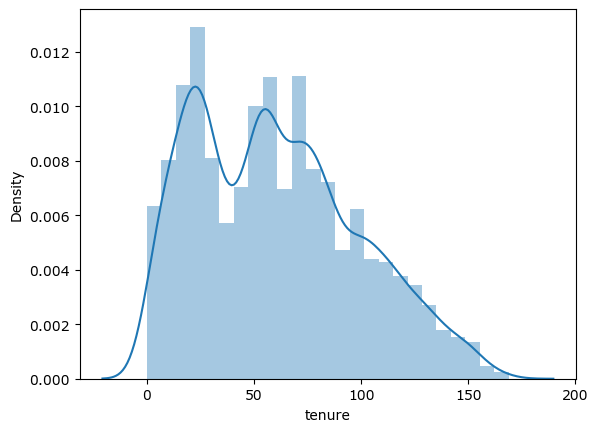

In [62]:
import seaborn as sns
sns.distplot(full_data['tenure'])

The full data (or main data) is a join of the other 3 data (except survey). It includes all details about the employee. Some transformations were done here.

## Demographic Data

In [29]:
demographic_data.head(10)

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
0,100001,female,female,White,0,0,Undergraduate,Heterosexual
1,100002,male,male,White,0,1,Undergraduate,Heterosexual
2,100003,female,female,Asian,0,0,Undergraduate,Heterosexual
3,100004,male,male,White,0,0,Undergraduate,Heterosexual
4,100005,male,male,Hispanic or Latino,0,0,Undergraduate,Missing
5,100006,male,Prefer not to say,White,0,0,Undergraduate,Heterosexual
6,100007,male,male,Asian,0,0,Some College,Bisexual
7,100008,female,female,White,0,0,High School,Missing
8,100009,male,male,White,0,0,Undergraduate,Heterosexual
9,100010,male,male,White,0,0,PhD,Gay


In [30]:
demographic_data.isna().sum()

EmployeeID              0
Gender                  0
Gender Identity         0
Race/Ethnicity        549
Veteran                 0
Disability              0
Education               0
Sexual Orientation      0
dtype: int64

In [31]:
demographic_data.describe(include='all')

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
count,4968.000000,4968,4968,4419,4968.000000,4968.000000,4968,4968
unique,NaN,2,5,9,NaN,NaN,5,6
top,NaN,male,male,White,NaN,NaN,Undergraduate,Heterosexual
freq,NaN,2570,2308,2658,NaN,NaN,3288,3141
mean,102484.500000,NaN,NaN,NaN,0.047504,0.042271,NaN,NaN
std,1434.282399,NaN,NaN,NaN,0.212736,0.201226,NaN,NaN
min,100001.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,101242.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,102484.500000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,103726.250000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN


Investigating null values in Race/Ethnicity column

In [32]:
set(demographic_data['Race/Ethnicity'])

{'American Indian or Alaska Native',
 'Asian',
 'Black or African American',
 'Hispanic or Latino',
 'Native American or Alaska Native',
 'Native Hawaiian or Other Pacific Islander',
 'Native Hawaiian or Pacific Islander',
 'Two or More Races',
 'White',
 nan}

We have 9 unique ethnicities in the data. For `NaN` values, I will treat is as `Prefer not to say` as it will be more meaningful for our data analysis purposes.

In [33]:
demographic_data.loc[demographic_data['Race/Ethnicity'].isna()].head(5)

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation
54,100055,male,male,NaN,0,0,Undergraduate,Heterosexual
62,100063,male,Prefer not to say,NaN,0,0,Undergraduate,Heterosexual
105,100106,female,female,NaN,0,0,Graduate,Heterosexual
113,100114,female,female,NaN,0,0,Undergraduate,Heterosexual
126,100127,female,female,NaN,0,0,Undergraduate,Missing


In [34]:
demographic_data['Race/Ethnicity'].fillna('Prefer not to say', inplace=True)
demographic_data.loc[demographic_data['Race/Ethnicity'].isna()]

,EmployeeID,Gender,Gender Identity,Race/Ethnicity,Veteran,Disability,Education,Sexual Orientation


This also removes all null values from demographic data.

## Survey Data

In [35]:
survey_data.head(10)

,EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.,...,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?
0,100001,2023Q2,3,3,2,1,1,3,2,4,...,3,4,2,2,4,4,3,3,NaN,NaN
1,100002,2023Q2,3,4,2,4,2,4,4,2,...,3,1,5,1,2,4,3,1,NaN,NaN
2,100009,2023Q2,3,4,2,3,4,3,2,2,...,1,1,3,2,2,3,2,4,NaN,NaN
3,100014,2023Q2,4,1,5,2,5,3,4,4,...,3,4,2,2,4,3,3,2,NaN,NaN
4,100018,2023Q2,4,1,1,1,2,3,1,3,...,4,3,2,4,3,2,2,3,NaN,NaN
5,100020,2023Q2,3,3,4,1,4,2,2,2,...,4,3,4,4,3,1,1,3,NaN,NaN
6,100021,2023Q2,4,1,4,2,2,4,4,1,...,2,3,4,2,3,4,4,4,NaN,NaN
7,100024,2023Q2,4,3,4,2,2,2,2,3,...,3,3,3,4,3,2,2,2,NaN,NaN
8,100031,2023Q2,4,4,2,4,3,4,4,4,...,3,4,4,1,3,2,2,4,NaN,NaN
9,100038,2023Q2,3,2,3,2,3,3,1,3,...,2,2,3,4,3,2,4,4,NaN,NaN


In [36]:
survey_data.describe(include='all').iloc[:,:10]

,EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.
count,2827.000000,2827,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,102732.819950,NaN,2.919703,2.931022,2.925716,2.907676,2.881854,2.901309,2.933498,2.931022
std,1443.057615,NaN,0.990180,1.025774,1.001485,1.016652,0.995840,1.012216,1.009421,1.002041
min,100001.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,101481.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,102786.000000,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,104030.500000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [37]:
survey_data.describe(include='all').iloc[:,10:]

,I am motivated to work hard at TheCompany.,I believe I am recognized for the work I do.,I believe there are good career opportunities for me at TheCompany.,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?
count,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.936328,2.938451,2.922179,2.941988,2.922179,2.921825,2.915104,2.923594,2.895649,2.940927,2.914751,NaN,NaN
std,1.001863,0.997749,1.018040,1.012394,1.020470,0.998180,1.002408,1.020923,1.031050,1.022592,1.024549,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,NaN
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN,NaN


The survey is a rating with a range of 1-5 with 5 being the highest. There is 19 questions for the survey. Two additional questions was for feedback towards TheCompany. I am going to extract the `quarter` value from `Survey` column.

In [38]:
survey_data['survey_quarter']=survey_data['Survey'].str[-2:]
survey_data.head().iloc[:,16:]

,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,What does TheCompany do well?,What can TheCompany improve?,survey_quarter
0,2,4,4,3,3,NaN,NaN,Q2
1,1,2,4,3,1,NaN,NaN,Q2
2,2,2,3,2,4,NaN,NaN,Q2
3,2,4,3,3,2,NaN,NaN,Q2
4,4,3,2,2,3,NaN,NaN,Q2


Let's look at the null values

In [39]:
survey_data.isna().sum()

EmployeeID                                                                                              0
Survey                                                                                                  0
I would recommend my friends or Family to work at TheCompany                                            0
I feel engaged in my work.                                                                              0
I believe Leadership cares about the employees at TheCompany                                            0
My manager supports me in my role at TheCompany                                                         0
TheCompany cares about Diversity, Equity and Inclusion.                                                 0
I believe there is room for me to grow at TheCompany                                                    0
I work on interesting projects.                                                                         0
My manager motivates me to work hard.         

All rows for the feedback columns i.e. `What does TheCompany do well?` and `What can TheCompany improve?` are null. We are going to remove those columns because at this stage it does not give any information.

In [40]:
survey_data.drop(['What does TheCompany do well?','What can TheCompany improve?'], axis=1,
                inplace=True)
survey_data.head()

,EmployeeID,Survey,I would recommend my friends or Family to work at TheCompany,I feel engaged in my work.,I believe Leadership cares about the employees at TheCompany,My manager supports me in my role at TheCompany,"TheCompany cares about Diversity, Equity and Inclusion.",I believe there is room for me to grow at TheCompany,I work on interesting projects.,My manager motivates me to work hard.,...,I believe there are good career opportunities for me at TheCompany.,I believe TheCompany is in a great position in the market for the next few years to be succesful.,I plan on staying with TheCompany for at least 2 more years.,I believe I am fairly compensated for my work.,I believe there is little to not politics at TheCompany,I feel comfortable going to someone in leadership if there is an issue.,My values align with the culture at TheCompany,I know what TheCompany values are at TheCompany,I feel like I can take off my accrued Paid Time Off (PTO)/Vacation without feeling guilty,survey_quarter
0,100001,2023Q2,3,3,2,1,1,3,2,4,...,2,3,4,2,2,4,4,3,3,Q2
1,100002,2023Q2,3,4,2,4,2,4,4,2,...,4,3,1,5,1,2,4,3,1,Q2
2,100009,2023Q2,3,4,2,3,4,3,2,2,...,2,1,1,3,2,2,3,2,4,Q2
3,100014,2023Q2,4,1,5,2,5,3,4,4,...,3,3,4,2,2,4,3,3,2,Q2
4,100018,2023Q2,4,1,1,1,2,3,1,3,...,4,4,3,2,4,3,2,2,3,Q2


In [41]:
print('Transformation done in --- %s seconds ---' % (time.time()-start_time))

Transformation done in --- 0.43019795417785645 seconds ---


We just dropped the two empty columns and add survey time `quarter` to the data.  
Now, let's load the data into a new dataset.

## Loading Phase

In [42]:
print('Loading Data ...')
start_time = time.time()

Loading Data ...


In [43]:
company_data.to_csv('cleanData/company_details.csv', index=False)
job_data.to_csv('cleanData/job_details.csv', index=False)
full_data.to_csv('cleanData/main_data.csv', index=False)
demographic_data.to_csv('cleanData/employee_details.csv', index=False)
survey_data.to_csv('cleanData/survey_data.csv', index=False)

In [44]:
print('Loading done in --- %s seconds ---' % (time.time()-start_time))

Loading done in --- 0.06433510780334473 seconds ---
